<a href="https://colab.research.google.com/github/Abhilaksh1498/SoC-20-Chatbot/blob/master/Cats_vs_Dogs_Classifier_(Image_Augumentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np

In [0]:
# Download the dataset
!mkdir dataset
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip \
      -O /content/dataset/cats-vs-dogs.zip

--2020-06-14 17:28:20--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.60.72.32, 2600:1409:12:285::e59, 2600:1409:12:2af::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.60.72.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/content/dataset/cats-vs-dogs.zip’

/content/dataset/ca 100%[===================>] 786.68M   124MB/s    in 6.3s    

2020-06-14 17:28:26 (125 MB/s) - ‘/content/dataset/cats-vs-dogs.zip’ saved [824894548/824894548]



In [0]:
!unzip /content/dataset/cats-vs-dogs.zip -d /content/dataset

In [0]:
import os
# Exploring the dataset
some_cat_names = os.listdir('/content/dataset/PetImages/Cat/') 
some_dog_names = os.listdir('/content/dataset/PetImages/Dog')
print(f'No of cat images are {len(some_cat_names)}')
print(f'No of dog images are {len(some_dog_names)}')

No of cat images are 12501
No of dog images are 12501


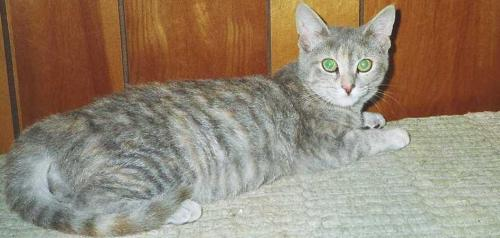

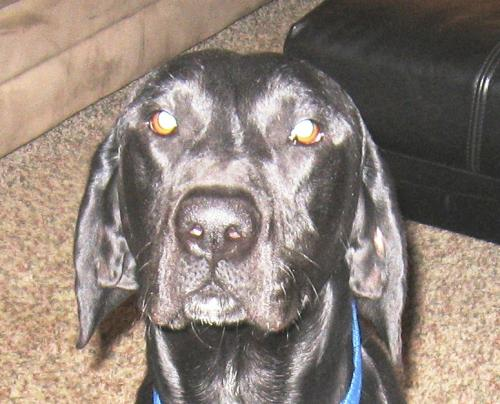

In [0]:
# Displaying a few random images from directories
from IPython.display import Image, display
display(Image('/content/dataset/PetImages/Cat/'+some_cat_names[10], width = 200, height =200))
display(Image('/content/dataset/PetImages/Dog/'+some_dog_names[10], width = 200, height =200))

In [0]:
from PIL import Image
def verify_image(img_file):
     #test image
     try:
        v_image = Image.open(img_file)
        v_image.verify()
        return True;
        #is valid
        #print("valid file: "+img_file)
     except OSError:
        return False;

corrupt_images = []

In [0]:
for fname in some_cat_names:
  if not(verify_image('/content/dataset/PetImages/Cat/'+fname)):
    corrupt_images.append('/content/dataset/PetImages/Cat/'+fname)

for fname in some_dog_names:
  if not(verify_image('/content/dataset/PetImages/Dog/'+fname)):
    corrupt_images.append('/content/dataset/PetImages/Dog/'+fname)

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

In [0]:
print(f'No of corrupt images: {len(corrupt_images)}')
print(corrupt_images)

No of corrupt images: 4
['/content/dataset/PetImages/Cat/Thumbs.db', '/content/dataset/PetImages/Cat/666.jpg', '/content/dataset/PetImages/Dog/Thumbs.db', '/content/dataset/PetImages/Dog/11702.jpg']


In [0]:
# Delete the corrupted images
import os
for x in corrupt_images:
  os.remove(x)

In [0]:
# We can check the no of images now
some_cat_names = os.listdir('/content/dataset/PetImages/Cat/') 
some_dog_names = os.listdir('/content/dataset/PetImages/Dog')
print(f'No of cat images are {len(some_cat_names)}')
print(f'No of dog images are {len(some_dog_names)}')

No of cat images are 12499
No of dog images are 12499


In [0]:
# We'll create train and validation dataset to use image datagen class
# Using .2 as validation split, 2501 images of dogs and cats each in validation
# 20000 total images for train
import random
# random.sample() returns a new shuffled list. The original list remains unchanged.
# random.shuffle() shuffles the original list
print(f'Original 1st 5 Cat names list {some_cat_names[:5]}')
random.shuffle(some_cat_names)
random.shuffle(some_dog_names)
print(f'Cats list after shuffling {some_cat_names[:5]}')

Original 1st 5 Cat names list ['5735.jpg', '5479.jpg', '5968.jpg', '457.jpg', '11355.jpg']
Cats list after shuffling ['8685.jpg', '1078.jpg', '8546.jpg', '3834.jpg', '6707.jpg']


In [0]:
# Copying 1st 2501 dogs and cats images to validation directory and rest to train directory in /content/
! mkdir train
! mkdir validation
! mkdir train/cats
! mkdir train/dogs
! mkdir validation/cats
! mkdir validation/dogs

In [0]:
import shutil
common_source_path = '/content/dataset/PetImages/'
common_dest_path = '/content/'
for i in range(len(some_cat_names)):   # We have same no of cats and dogs
  if i<10000:
    shutil.copyfile(common_source_path+'Cat/'+some_cat_names[i], common_dest_path+'train/cats/'+some_cat_names[i])
    shutil.copyfile(common_source_path+'Dog/'+some_dog_names[i], common_dest_path+'train/dogs/'+some_dog_names[i])
  else:
    shutil.copyfile(common_source_path+'Cat/'+some_cat_names[i], common_dest_path+'validation/cats/'+some_cat_names[i])
    shutil.copyfile(common_source_path+'Dog/'+some_dog_names[i], common_dest_path+'validation/dogs/'+some_dog_names[i])


In [0]:
# We can verify how many images are there after copying
train_cats = os.listdir('/content/train/cats/')
validation_dogs = os.listdir('/content/validation/dogs/')
print(f'No of cat images in train is {len(train_cats)}')
print(f'No of dogs in Validation set is {len(validation_dogs)}')

No of cat images in train is 10000
No of dogs in Validation set is 2499


In [0]:
# Build the model 
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 16)        9232      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               5308672   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [0]:
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer= 'adam', metrics= ['accuracy'] )

In [0]:
# We'll use imageDatagen class for which we need to set appropriate validation and train directories
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale= 1.0/255. )   # Normalise the images
validation_generator = ImageDataGenerator(rescale= 1.0/255. )

training_data = train_generator.flow_from_directory(directory= '/content/train/', target_size= (150,150), class_mode= 'binary', batch_size= 50)
# color_mode argument is also there which needs to be changed if we were working with greyscale images (default value is rgb for that)
validation_data = validation_generator.flow_from_directory(directory= '/content/validation/', target_size= (150,150), class_mode= 'binary', batch_size= 50)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [0]:
history = model.fit(training_data,
                    validation_data=validation_data, # validation_split argument isn't supported when working with generators
                    # By default steps_per_epoch parameter is num_samples/batch size
                    epochs=2)
                    # validation_steps also need not be provided, it is total no of times validation_batch_size (specified in generator class)
                    # num of samples will be tested for validation after each epoch

Epoch 1/2
395/400 [============================>.] - ETA: 0s - loss: 0.6933 - accuracy: 0.5495

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

400/400 [==============================] - 93s 232ms/step - loss: 0.6931 - accuracy: 0.5501 - val_loss: 0.6717 - val_accuracy: 0.6016
Epoch 2/2
400/400 [==============================] - 92s 229ms/step - loss: 0.6127 - accuracy: 0.6679 - val_loss: 0.6212 - val_accuracy: 0.6599


In [0]:
# Now we'll use Data augumentation on training dataset and see the difference
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rescale= 1.0/255., 
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')
training_data = train_generator.flow_from_directory(directory= '/content/train/', target_size= (150,150), class_mode= 'binary', batch_size= 50)
validation_generator = ImageDataGenerator(rescale= 1.0/255. )
validation_data = validation_generator.flow_from_directory(directory= '/content/validation/', target_size= (150,150), class_mode= 'binary', batch_size= 50)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model.summary()
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer= 'adam', metrics= ['accuracy'] )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 16)        9232      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               5308672   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

In [0]:
history = model.fit(training_data,
                    validation_data=validation_data, # validation_split argument isn't supported when working with generators
                    # By default steps_per_epoch parameter is num_samples/batch size
                    epochs=5)

Epoch 1/5
333/400 [=======================>......] - ETA: 22s - loss: 0.6819 - accuracy: 0.5747

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

400/400 [==============================] - 150s 375ms/step - loss: 0.6791 - accuracy: 0.5792 - val_loss: 0.6607 - val_accuracy: 0.6116
Epoch 2/5
400/400 [==============================] - 150s 374ms/step - loss: 0.6491 - accuracy: 0.6292 - val_loss: 0.6249 - val_accuracy: 0.6591
Epoch 3/5
400/400 [==============================] - 149s 374ms/step - loss: 0.6296 - accuracy: 0.6431 - val_loss: 0.6013 - val_accuracy: 0.6867
Epoch 4/5
400/400 [==============================] - 151s 377ms/step - loss: 0.6089 - accuracy: 0.6704 - val_loss: 0.6098 - val_accuracy: 0.6857
Epoch 5/5
400/400 [==============================] - 151s 377ms/step - loss: 0.6002 - accuracy: 0.6791 - val_loss: 0.5631 - val_accuracy: 0.7223


In [0]:
# Predicting on some test images
from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")


Using TensorFlow backend.


Saving dog.jpg to dog.jpg


In [0]:
img = image.load_img(path = '/content/dog.jpg', target_size= (150,150))
img = image.img_to_array(img)
print(f'Shape of image now is {img.shape}')    # Shape of image now is (150, 150, 3)
# Note that while using .predict method we need a 4D array hence we need to expand dimension
img = np.expand_dims(img, axis = 0)
print(f'Shape of image after expanding dim is {img.shape}')

Shape of image now is (150, 150, 3)
Shape of image after expanding dim is (1, 150, 150, 3)


In [0]:
y_pred = model.predict(img)   # returns labels, labels are assigned alphanumerically to directory names. Hence Dog would be 1 and Cat = 0
print(y_pred.shape)

(1, 1)


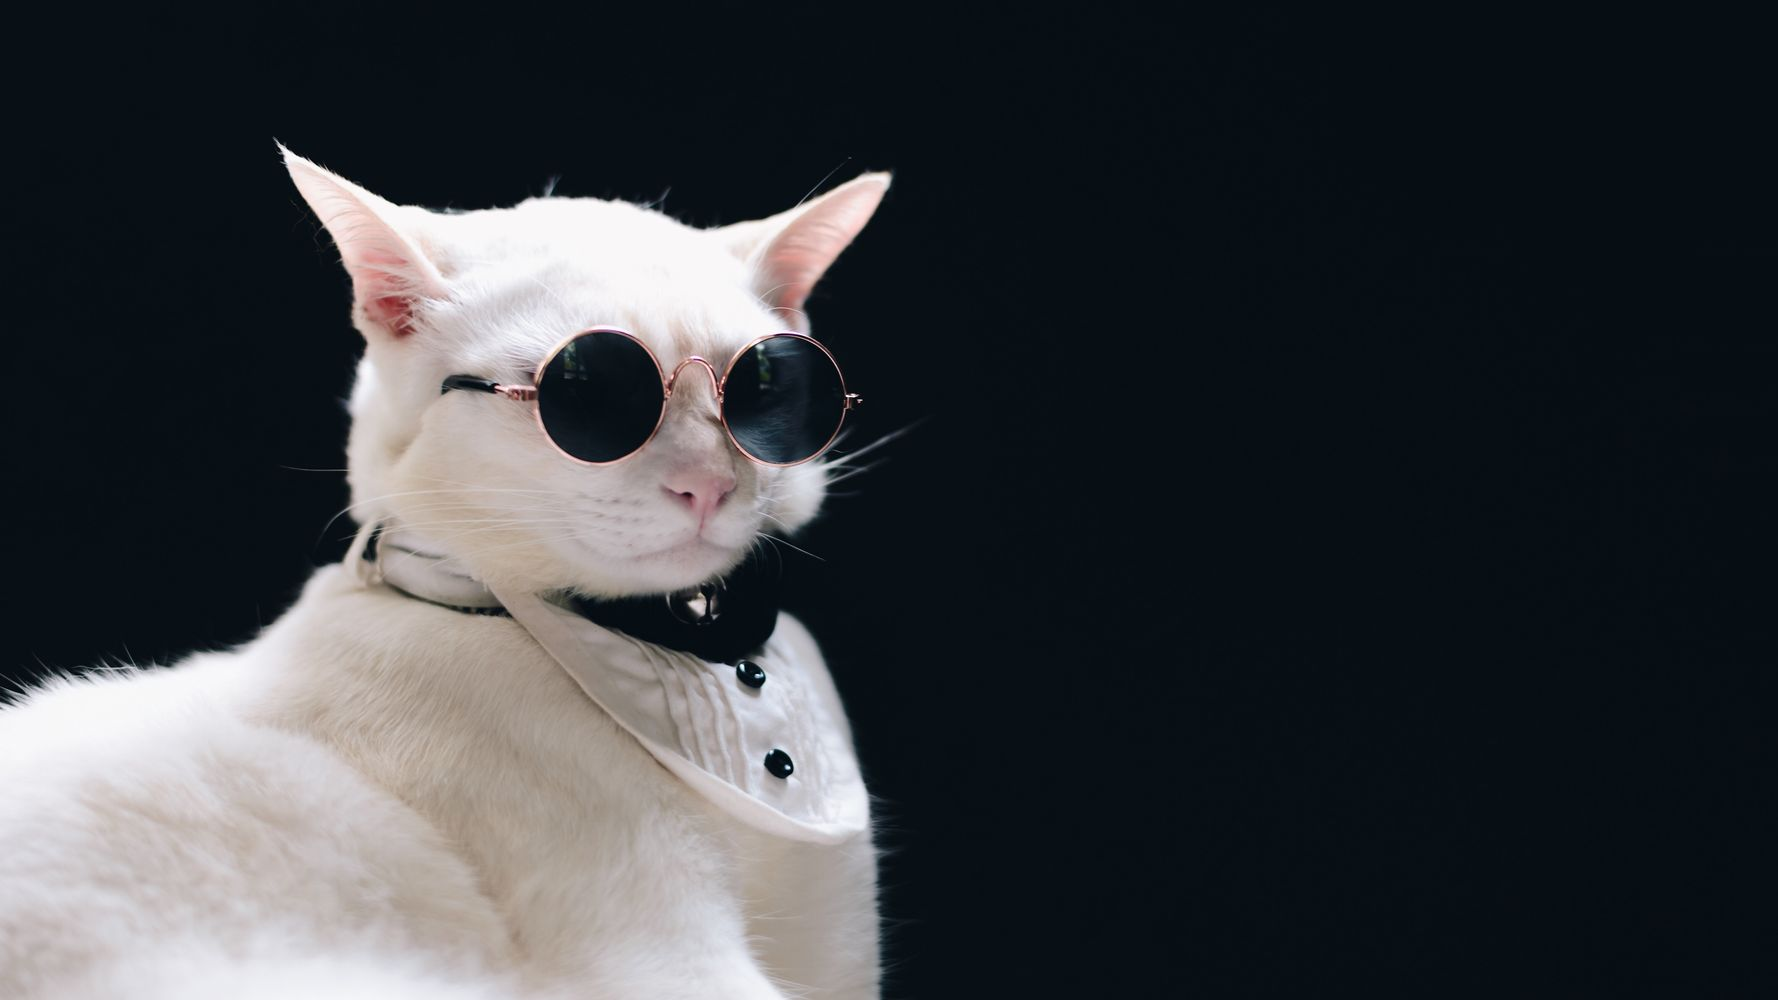

According to me it is a dog


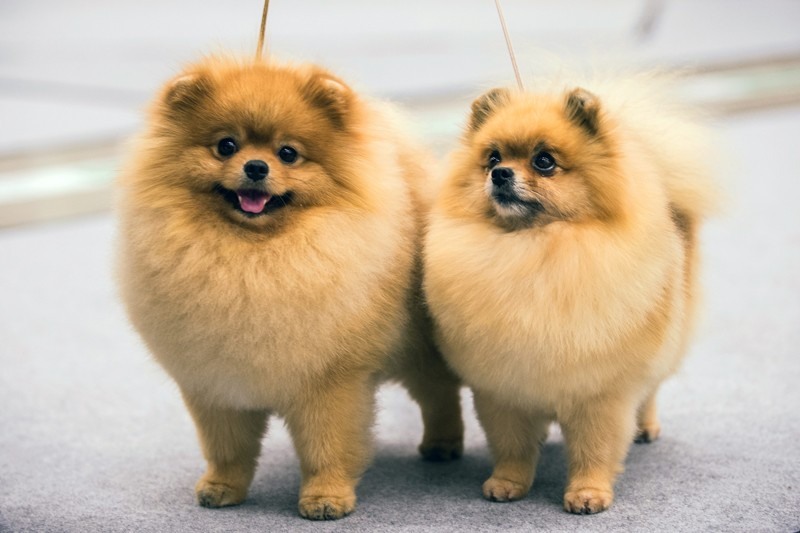

According to me it is a dog


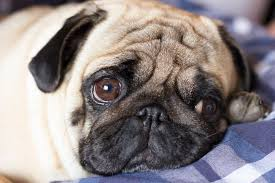

According to me it is a dog


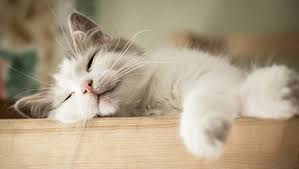

According to me this is a cat


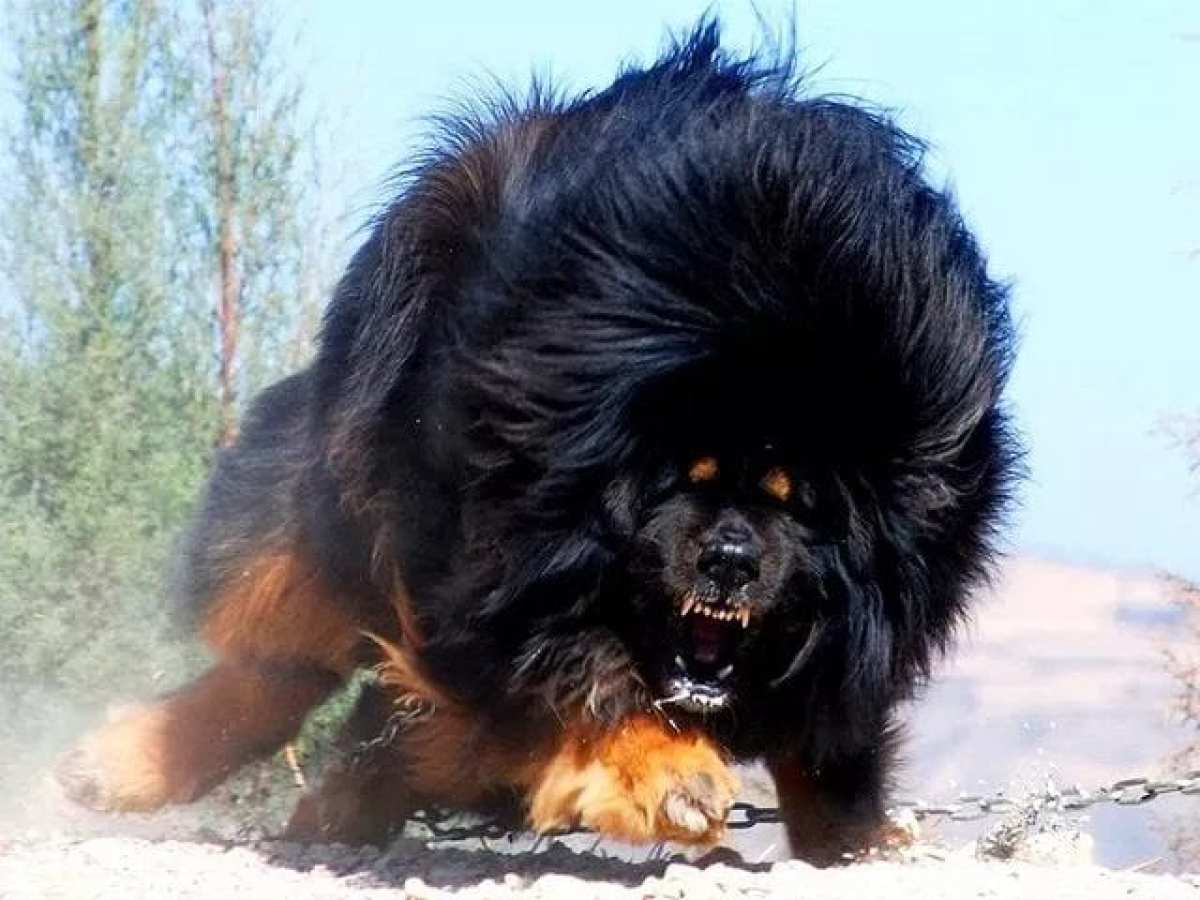

According to me it is a dog


In [0]:
# Lets predict 5 images downloaded from google
from IPython.display import Image, display
uploaded = files.upload()
test_images = []
for fn in uploaded.keys():
  ############ CONVERTING IMAGE TO NUMPY ARRAY ################
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  img=image.img_to_array(img)
  test_images.append(img)
  img = np.expand_dims(img, axis = 0)
  classes = model.predict(img)

  # Display the images
  display(Image('/content/'+ fn, width = 200, height =200))
  
  if classes[0]>0:
    print("According to me it is a dog")
    
  else:
    print("According to me this is a cat")
test_images = np.array(test_images)

In [0]:
print(model.predict(test_images))
print('hence predict method has shape (num_samples,1)')

[[1.]
 [1.]
 [1.]
 [0.]
 [1.]]
hence predict method has shape (num_samples,1)
